# 随机模块random

## 常规用法

无论在做测试中还是在做模拟中,随机都是必须的模块,具体这样用:

In [1]:
import random

In [2]:
random.random()        # [0,1)内随机浮点数

0.7824556762411076

In [3]:
random.uniform(1, 10)  # [1,10)内随机浮点数

8.901229706407147

In [4]:
random.randint(1, 10)  # [1,10]范围内的随机整数

8

In [5]:
random.randrange(0, 101, 2)  # 从等差数列中随机挑一个数

88

In [6]:
random.choice('abcdefghij')  # 随机选一个

'd'

In [7]:
items = [1, 2, 3, 4, 5, 6, 7]
random.shuffle(items)#随机排序

In [8]:
random.sample([1, 2, 3, 4, 5],  3)  # 随机选3个元素

[5, 2, 4]

## 随机种子

学过C的都知道[伪随机](http://baike.baidu.com/link?url=jnG_iX8HCXPxH-bsD2_HH2Z7XvX-o_6AfQvmNPMq9d2PaFv34aCoS33yJ7n94XOrt2I0EhZGjttpOEYPIR8cHK),python也是伪随机,所以可以通过设定`seed`值来改变随机状态

In [9]:
from matplotlib import pyplot as plt

In [10]:
%matplotlib inline

## 数学上的一些特殊随机

### 三角分布:

三角分布式是连续概率分布,可以看做是在一个范围中有一个数(众数)它附近有最高的概率密度即最有可能出现在该众数上

    random.triangular(low, high, mode)#三角形分布,默认众数(mode)是中值

In [11]:
hight,low,mode = 0,2,0.5
random.triangular(hight,low,mode)

1.2624977374708657

In [12]:
from collections import Counter

In [13]:
c = Counter()
for nbr in [round(random.triangular(0,2,0.5),2) for i in range(10000)]:
    c[nbr] = c[nbr] + 1

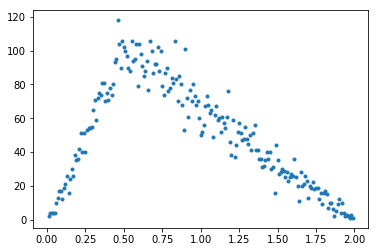

In [14]:
plt.plot([float(i) for i in c.keys()],[float(i) for i in c.values()],".")
plt.show()

### β分布

β分布是在0到1上的特殊分布,

做硬币试验的假定分布，即做伯努利试验的假定分布在确定伯努利试验的分布之前，我们利用试验的少量数据来估计试验的概率（作为先验概率）beta分布涉及两个参数：1、试验成功的次数2、试验失败的次数.

概率密度函数为:

$\begin{align}
f(x)=&
x^{\alpha-1}(1-x)^{\beta-1}
\over
\int_0^1 u^{\alpha-1}(1-u)^{\beta-1}du\\
=&{\frac {\Gamma(\alpha+\beta)} {\Gamma(\alpha)\Gamma(\beta)}}x^{\alpha-1}(1-x)^{\beta-1}\\
=&{\frac {1} {B(\alpha-\beta)}}x^{\alpha-1}(1-x)^{\beta-1}
\end{align}
$

累积分布函数:

$\begin{align}
F(x;\alpha,\beta)=& \frac {B_x(\alpha,\beta)} {B(\alpha,\beta)}&=I_x(\alpha,\beta)
\end{align}
$

其中${B_x(\alpha,\beta)}$是不完全Β函数,${I_x(\alpha,\beta)}$ 是正则不完全贝塔函数


是不完全Β函数，$I_x (\alpha,\beta)$ 是正则不完全贝塔函数

    random.betavariate(alpha, beta)#beta分布


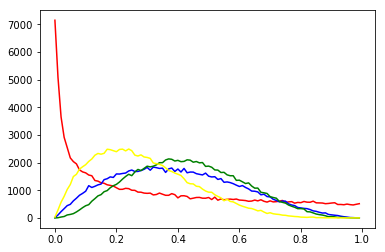

In [15]:
l0=[random.betavariate(0.5,1) for i in range(100000)]
l1=[random.betavariate(2,3) for i in range(100000)]
l2=[random.betavariate(3,4) for i in range(100000)]
l3=[random.betavariate(2,5) for i in range(100000)]

r0=[len([1 for j in l0 if i+0.005>j>i-0.005]) 
    for i in map(lambda x:round(x*0.01,3),range(0,100,1))]
r1=[len([1 for j in l1 if i+0.005>j>i-0.005]) 
    for i in map(lambda x:round(x*0.01,3),range(0,100,1))]
r2=[len([1 for j in l2 if i+0.005>j>i-0.005]) 
    for i in map(lambda x:round(x*0.01,3),range(0,100,1))]
r3=[len([1 for j in l3 if i+0.005>j>i-0.005]) 
    for i in map(lambda x:round(x*0.01,3),range(0,100,1))]

plt.plot(list(map(lambda x:round(x*0.01,3),
                  range(0,100,1))),r0,color="red")
plt.plot(list(map(lambda x:round(x*0.01,3),
                  range(0,100,1))),r1,color="blue")
plt.plot(list(map(lambda x:round(x*0.01,3),
                  range(0,100,1))),r2,color="green")
plt.plot(list(map(lambda x:round(x*0.01,3),
                  range(0,100,1))),r3,color="yellow")
plt.show()

## 指数分布

概率密度函数:

指数分布可以用来表示独立随机事件发生的时间间隔，比如旅客进机场的时间间隔、中文维基百科新条目出现的时间间隔等等。
许多电子产品的寿命分布一般服从指数分布。有的系统的寿命分布也可用指数分布来近似。它在可靠性研究中是最常用的一种分布形式。指数分布是伽玛分布和威布尔分布的特殊情况，产品的失效是偶然失效时，其寿命服从指数分布。
指数分布可以看作当威布尔分布中的形状系数等于1的特殊分布，指数分布的失效率是与时间t无关的常数，所以分布函数简单。

概率密度函数:

$ f(x)=\begin{cases}
    \lambda e^{-\lambda x}&\text{$x>0$},\\
    0&\text{$x\le0$}.
\end{cases} 
$
累积分布函数:

$ F(x;\lambda)=\begin{cases}
    1- e^{-\lambda x}&\text{$x\ge0$},\\
    0&\text{$x<0$}.
\end{cases} $

期望值:

$ EX=\lambda^{-1} $

方差:
$D(X)=Var(X)=\lambda ^{-2}$

    random.expovariate(lambd)


In [16]:
random.expovariate(3)

0.5578234614537964

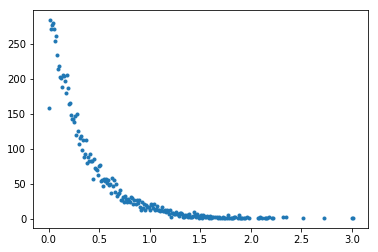

In [17]:
c_e3 = Counter()
for nbr in [round(random.expovariate(3),2 )
            for i in range(10000)]:
    c_e3[nbr] = c_e3[nbr] + 1
plt.plot([float(i) for i in c_e3.keys()],
         [float(i) for i in c_e3.values()],".")
plt.show()

## 伽玛分布

概率密度函数:

令  $X\sim  \Gamma(\alpha,\beta)$ ;
则有:
$f(x)={\frac {x^{(\alpha-1)} e^{(-\lambda x)}} {\Gamma(\alpha)\beta^\alpha}} ,x>0
$
    
    
    random.gammavariate(alpha, beta)

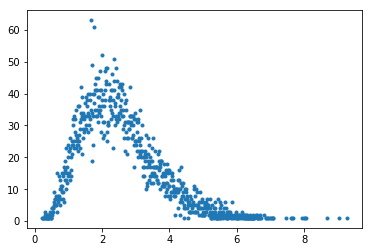

In [18]:
c_gamma = Counter()
for nbr in [round(random.gammavariate(5,0.5),2 )
            for i in range(10000)]:
    c_gamma [nbr] = c_gamma [nbr] + 1
plt.plot([float(i) for i in c_gamma.keys()],
         [float(i) for i in c_gamma.values()],".")
plt.show()

## 高斯分布(正态分布)

概率密度函数:

$
f(x)={\frac 1 {\sqrt {2\pi}\sigma}} e^{-{\frac {(x-\mu)^2} {2\sigma^2}}}
$
其中 $\mu$ 与 $\sigma$ 分别是变量对数的平均值与标准差


    random.gauss(mu, sigma)#略快于下面的方法

    random.normalvariate(mu, sigma)

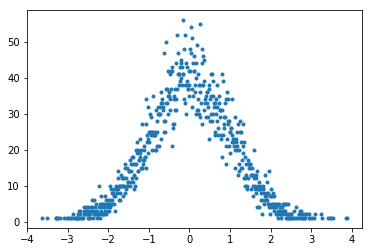

In [19]:
c_gauss = Counter()
for nbr in [round(random.gauss(0,1),2 )
            for i in range(10000)]:
    c_gauss[nbr] = c_gauss[nbr] + 1
plt.plot([float(i) for i in c_gauss.keys()],
         [float(i) for i in c_gauss.values()],".")
plt.show()

## 对数正态分布

如果 X 是正态分布的随机变量，则 exp(X) 为对数正态分布；同样，如果 Y 是对数正态分布，则 ln(Y) 为正态分布。 如果一个变量可以看作是许多很小独立因子的乘积，则这个变量可以看作是对数正态分布。

概率密度函数:
$
f(x;\mu,\sigma) = \frac{1}{ \sigma \sqrt{2 \pi}} e^{-(\ln x - \mu)^2/2\sigma^2}
$

其中 $\mu$ 与 $\sigma$ 分别是变量对数的平均值与标准差

    random.lognormvariate(mu, sigma)


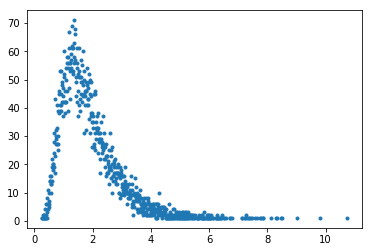

In [20]:
c_log = Counter()
for nbr in [round(random.lognormvariate(0.5,0.5),2 )
            for i in range(10000)]:
    c_log[nbr] = c_log[nbr] + 1
plt.plot([float(i) for i in c_log.keys()],[float(i) 
                                           for i in c_log.values()],".")
plt.show()

## 冯·米塞斯分布

冯·米塞斯分布（von Mises distribution）指一种圆上连续概率分布模型，它也被称作循环正态分布

概率密度函数:
$
f(x|\mu,\kappa)=\frac{e^{\kappa\cos(x-\mu)}}{2\pi I_0(\kappa)}
$

参数μ和1/κ是μ和σ^2（对应正态分布中的均值和方差）的模拟量
+ μ是位置的度量（分布将围绕μ成簇）
+ κ是集中度的度量（分散度的倒数，所以1/κ是σ^2的模拟量）
+ + 如果κ为0，分布是均匀分布，对于κ很小的情形，分布近似均匀分布
+ + 如果κ很大，分布紧紧围绕μ集中分布。实际上，随着κ增加，分布将趋于x以μ为均值1/κ为方差的正态分布



    random.vonmisesvariate(mu, kappa)
    

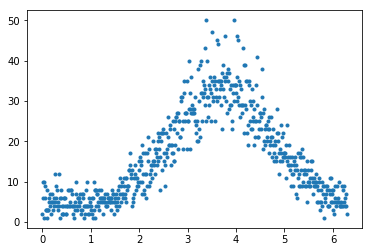

In [21]:
c_von = Counter()
for nbr in [round(random.vonmisesvariate(10,1),2 )
            for i in range(10000)]:
    c_von[nbr] = c_von[nbr] + 1
plt.plot([float(i) for i in c_von.keys()], 
         [float(i) for i in c_von.values()],".")
plt.show()

## 帕累托分布

帕累托法则(2,8定律)
帕累托分布是以意大利经济学家维弗雷多·帕雷托命名的。 是从大量真实世界的现象中发现的幂定律分布。这个分布在经济学以外，也被称为布拉德福分布。

概率密度函数:
$
p(x) = \left \{ \begin{matrix} 0, & \mbox{if }x < x_{\min}; \\  \\ {\frac{k \; x_{\min}^k} {x^{k+1}}}, & \mbox{if }x > x_{\min}. \end{matrix} \right.
$

k是形状参数(shape parameter)


    random.paretovariate(k)

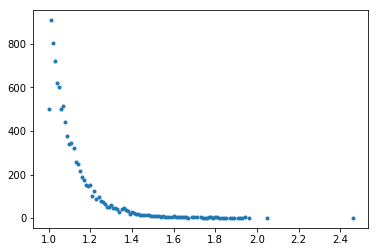

In [22]:
c_par = Counter()
for nbr in [round(random.paretovariate(10),2 )
            for i in range(10000)]:
    c_par[nbr] = c_par[nbr] + 1
plt.plot([float(i) for i in c_par.keys()],
         [float(i) for i in c_par.values()],".")
plt.show()

## 韦伯分布

韦伯分布（Weibull distribution），又称韦氏分布或威布尔分布，是可靠性分析和寿命检验的理论基础。

概率密度函数:

$
f(x;\lambda,k) =  \begin{cases}
\frac{k}{\lambda}\left(\frac{x}{\lambda}\right)^{k-1}e^{-(x/\lambda)^{k}} & x\geq0\\
0 & x<0\end{cases}
$

λ＞0是比例参数（scale parameter），k＞0是形状参数（shape parameter）

    random.weibullvariate(lambda, k)


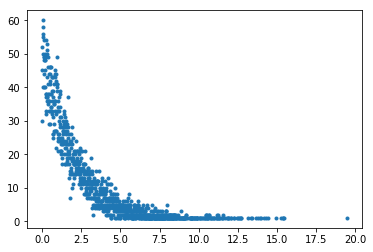

In [23]:
c_wei = Counter()
for nbr in [round(random.weibullvariate(2,1),2 ) 
            for i in range(10000)]:
    c_wei[nbr] = c_wei[nbr] + 1
plt.plot([float(i) for i in c_wei.keys()], 
         [float(i) for i in c_wei.values()],".")
plt.show()